## Exploration

train.csv shape is  (139753, 9)
test.csv shape is  (13976, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0  1049849  B000MR9D5E  A1EKSETIBS9ETQ                     0   
1   999834  B000GAKFIG   AR0HFYHYHDGQQ                     2   
2   218826  6300215776  A37S3ACL57LN62                    11   
3   796384  B00019071C  A1TO1P3NV7OAU6                     2   
4  1219784  B001NFNFN0   ATCM1W7HWIC6U                     0   

   HelpfulnessDenominator        Time  \
0                       0  1198281600   
1                       5  1245024000   
2                      15  1126137600   
3                       2  1351036800   
4                       0  1381708800   

                                             Summary  \
0  Great nature series, but not all scenes looked...   
1                 Agatha Christie's Marple: Series 2   
2                             Childish Entertainment   
3                       The weakest Babylon 5 season   
4                        

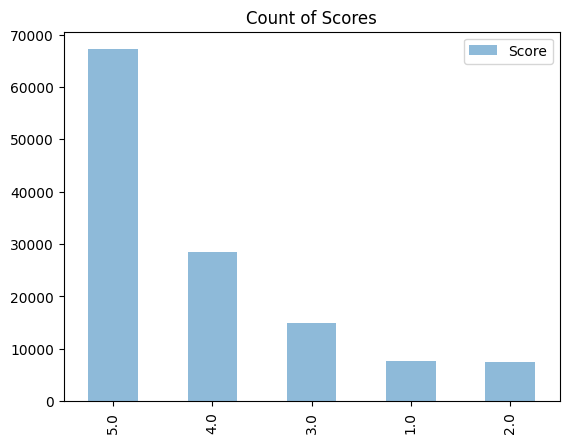

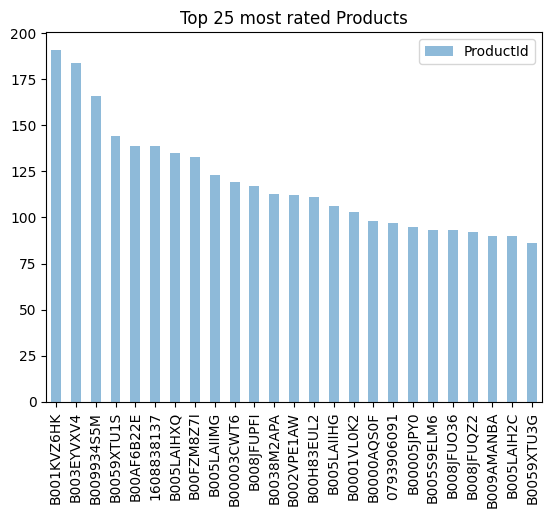

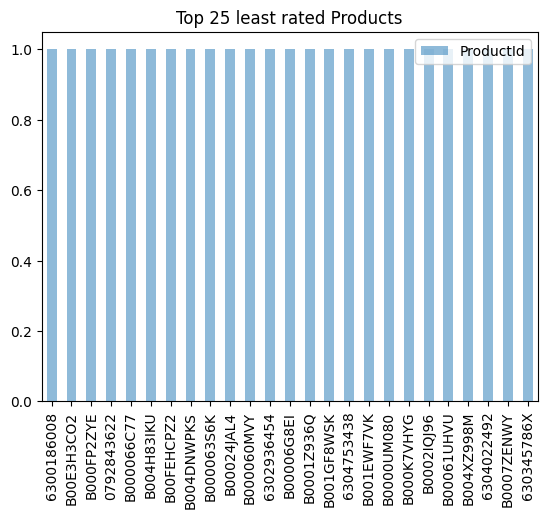

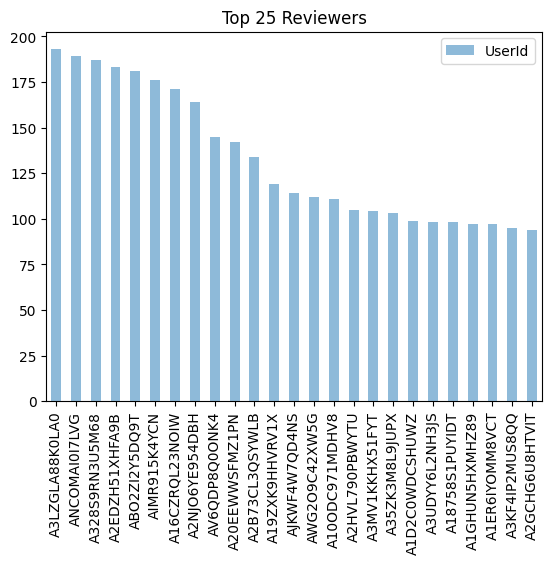

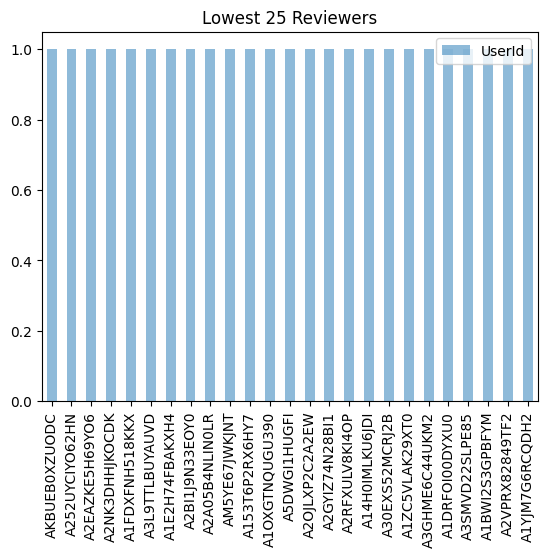

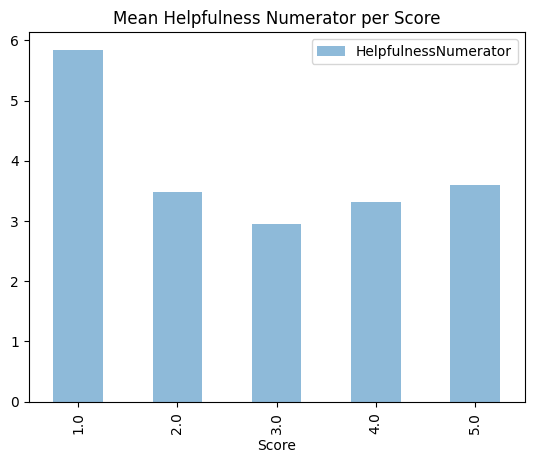

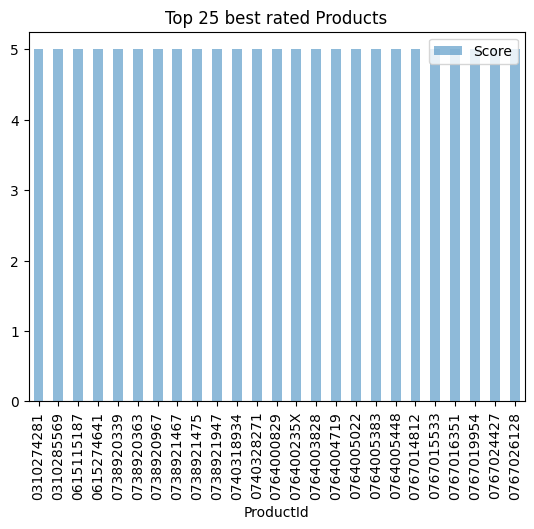

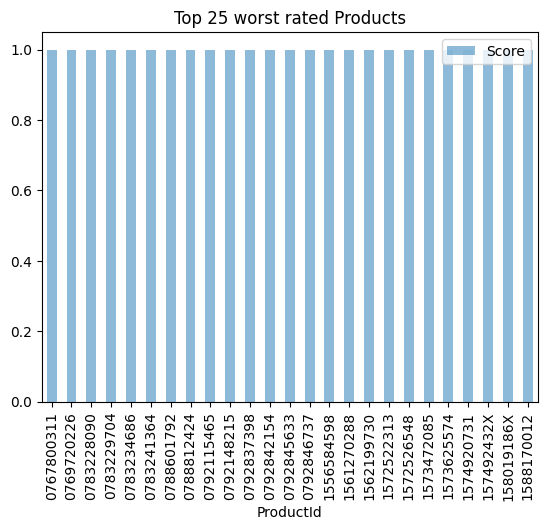

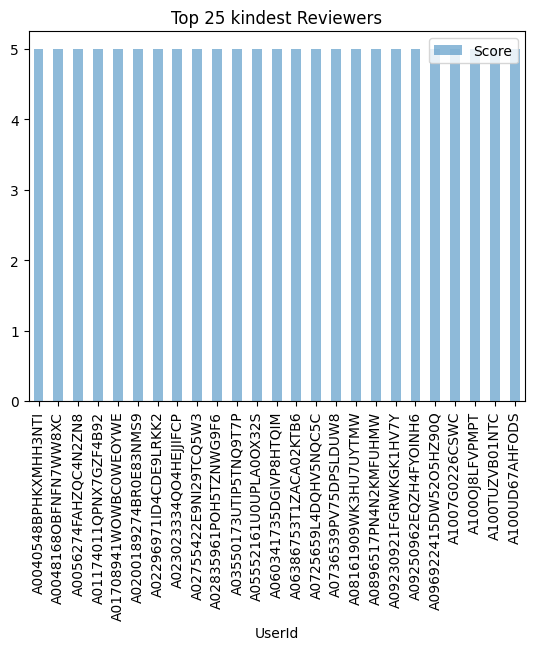

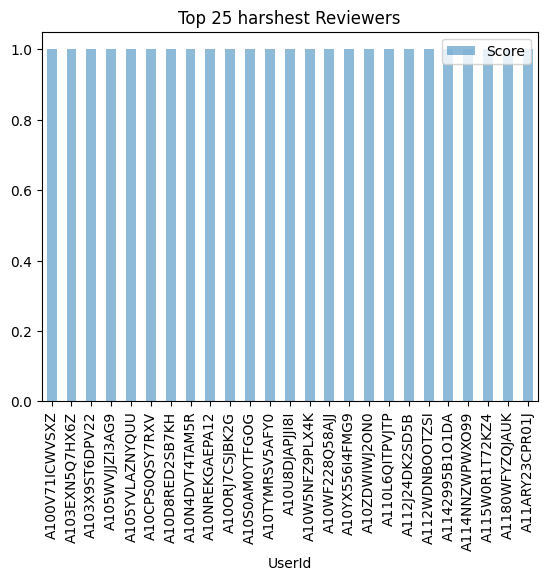

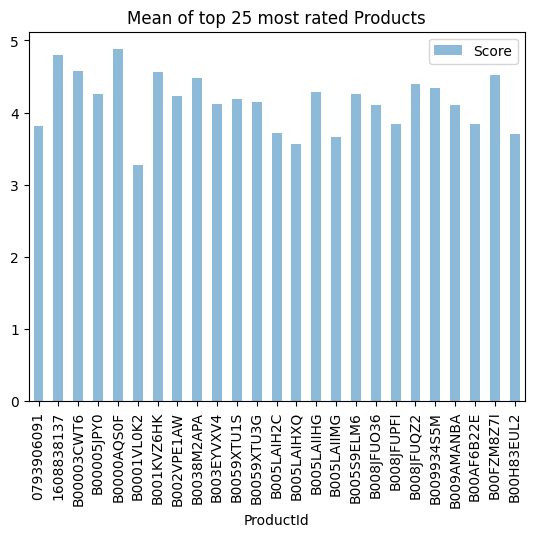

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

## Feature Extraction

In [67]:
import pandas as pd

def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)

    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['Score'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)


Drop too kindest reviewers and too harshest reviewers

## Creating your model

In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )

X_train['Text'].fillna('', inplace=True)
X_train['Summary'].fillna('', inplace=True)

# # Vectorize the text data using TF-IDF
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train['Text'] + ' ' + X_train['Summary'])
# X_test_tfidf = vectorizer.transform(X_test['Text'] + ' ' + X_test['Summary'])

# # Combine the processed text data with the other features
# X_train_processed = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names())
# X_test_processed = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names())


# This is where you can do more feature selection
# X_train_processed = X_train_processed.drop(columns=['Id', 'ProductId', 'UserId'])
# X_test_processed = X_test_processed.drop(columns=['Id', 'ProductId', 'UserId'])

# # Learn the model
# model = KNeighborsClassifier(n_neighbors=20).fit(X_train_processed, Y_train)

# # pickle model - saves it so you can load it later
# with open('knn_20_model.obj', 'wb') as f:
#         pickle.dump(model, f)
# # to load pickled model: 
# # with open('filename', 'rb') as f:
# #    model = pickle.load(f)

# # Evaluate your model on the testing set
# Y_test_predictions = model.predict(X_test_processed)
# print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
# print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# # Plot a confusion matrix
# cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
# sns.heatmap(cm, annot=True)
# plt.title('Confusion matrix of the classifier')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000, min_df=5, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train['Text'] + ' ' + X_train['Summary'])
X_test_tfidf = vectorizer.transform(X_test['Text'] + ' ' + X_test['Summary'])

X_train_processed = X_train[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'ReviewLength']].reset_index(drop=True)
X_test_processed = X_test[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'ReviewLength']].reset_index(drop=True)

# Concatenate the TF-IDF matrix to the DataFrames
X_train_processed = pd.concat([X_train_processed, pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names())], axis=1)
X_test_processed = pd.concat([X_test_processed, pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names())], axis=1)

/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np
def custom_distance(x1, x2):
    # Assume x1 and x2 are two input data points in the form of numpy arrays
    # The first two elements of the array correspond to HelpfulnessNumerator and HelpfulnessDenominator
    # The rest of the elements correspond to the TF-IDF vector
    
    w1 = 5 # weight for HelpfulnessNumerator
    w2 = 5 # weight for HelpfulnessDenominator
    w3 = 1 # weight for TF-IDF vector
    
    h1_diff = (x1[0] / x1[1]) - (x2[0] / x2[1])
    h2_diff = (x1[1] / x1[0]) - (x2[1] / x2[0])
    tfidf_diff = np.linalg.norm(x1[2:] - x2[2:])
    
    # calculate weighted distance
    distance = np.sqrt(w1 * h1_diff ** 2 + w2 * h2_diff ** 2 + w3 * tfidf_diff ** 2)
    
    return distance


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

Accuracy on testing set =  0.45588235294117646
RMSE on testing set =  2.5587622549019606


/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


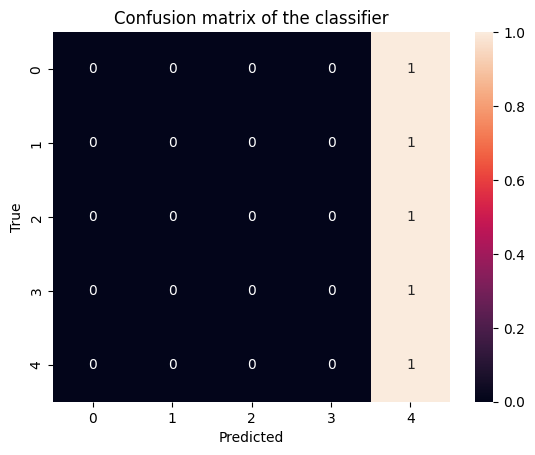

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15],
#     'min_samples_leaf': [1, 2, 4]
# }
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300],
    'solver': ['lbfgs', 'liblinear']
}
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])
text_transformer = Pipeline(steps=[
    ('vectorizer', CountVectorizer(stop_words='english', max_features=5000, min_df=5, ngram_range=(1, 2))),
    ('pca', PCA(n_components=10))
])
model = LogisticRegression(random_state=42)

# random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
#                                    param_distributions=param_grid,
#                                    n_iter=10,
#                                    scoring='accuracy',
#                                    cv=3,
#                                    verbose=1,
#                                    random_state=42)
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'Time', 'ReviewLength']),
    ('text', text_transformer, ['Text', 'Summary'])
])

random_search = RandomizedSearchCV(estimator=LogisticRegression(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3,
                                   verbose=1,
                                   random_state=42)


vectorizer = CountVectorizer(stop_words='english',max_features=5000, min_df=5, ngram_range=(1, 2))

# Vectorize the text data using TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english',max_features=5000, min_df=5, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train['Text'] + ' ' + X_train['Summary'])
X_test_tfidf = vectorizer.transform(X_test['Text'] + ' ' + X_test['Summary'])

# Apply PCA to the TF-IDF matrix to reduce the dimensionality
pca = PCA(n_components=10)
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_tfidf_pca = pca.transform(X_test_tfidf.toarray())

# Create the processed DataFrames for training, testing, and submission data
X_train_processed = X_train[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'Time', 'ReviewLength']].reset_index(drop=True)
X_train_processed = pd.concat([X_train_processed, pd.DataFrame(X_train_tfidf_pca)], axis=1)

X_test_processed = X_test[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'Time', 'ReviewLength']].reset_index(drop=True)
X_test_processed = pd.concat([X_test_processed, pd.DataFrame(X_test_tfidf_pca)], axis=1)

# Learn the model
# model = KNeighborsClassifier(n_neighbors=20, metric=custom_distance).fit(X_train_processed, Y_train)
# model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# model.fit(X_train_processed, Y_train)

random_search.fit(X_train_processed, Y_train)
best_model = random_search.best_estimator_

# best_model = SVC(kernel='rbf', C=1, gamma=0.1)
# best_model.fit(X_train_processed, Y_train)

# Evaluate your model on the testing set
Y_test_predictions = best_model.predict(X_test_processed)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
X_train_processed

,HelpfulnessNumerator,HelpfulnessDenominator,Time,ReviewLength,0,1,2,3,4
0,5,8,1073520000,210,-0.086314,0.303138,0.018849,0.007567,0.003204
1,0,1,1371945600,21,0.086554,-0.052381,-0.030708,0.045975,-0.062748
2,1,1,1356998400,25,-0.018189,0.008146,0.002425,-0.039541,0.034372
3,0,0,1333584000,257,0.040455,0.025437,-0.005940,-0.010409,-0.013559
4,0,1,1119052800,41,0.016880,0.017534,0.000545,-0.013099,-0.001999
...,...,...,...,...,...,...,...,...,...
48954,1,2,1129766400,111,0.086833,0.037082,0.002769,-0.048738,0.075042
48955,12,12,1133481600,50,-0.094195,-0.015789,-0.023616,0.002784,-0.056729
48956,1,1,1333929600,36,-0.020894,0.001712,0.005523,-0.024194,0.026101
48957,1,3,1312156800,147,0.042630,0.007504,-0.004836,-0.009315,0.018007


## Create the Kaggle submission

In [ ]:
# X_submission = pd.read_csv("./data/X_test.csv")
# X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

# X_submission['Score'] = model.predict(X_submission_processed)
# submission = X_submission[['Id', 'Score']]
# submission.to_csv("./data/submission.csv", index=False)

In [ ]:
X_submission = pd.read_csv("./data/X_test.csv")
X_submission_processed = pd.DataFrame()

# Vectorize the text data using TF-IDF
X_submission_text = X_submission['Text'].fillna('') + ' ' + X_submission['Summary'].fillna('')
X_submission_tfidf = vectorizer.transform(X_submission_text)
X_submission_tfidf_pca = pca.transform(X_submission_tfidf.toarray())

# Add the other features to the processed submission data
X_submission_processed = X_submission[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'Time', 'ReviewLength']].reset_index(drop=True)

# Concatenate the TF-IDF matrix to the DataFrames
X_submission_processed = pd.concat([X_submission_processed, pd.DataFrame(X_submission_tfidf_pca)], axis=1)

# Make the prediction for the submission data
submission_pred = best_model.predict(X_submission_processed)

# Save the submission file
submission = pd.DataFrame({'Id': X_submission['Id'], 'Score': submission_pred})
submission.to_csv("./data/submission.csv", index=False)


/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Now you can upload the `submission.csv` to kaggle

In [89]:
# Load training set into DataFrame
X_train = pd.read_csv("./data/X_train.csv")

# Calculate proportion of each score in the training set
score_counts = X_train['Score'].value_counts()
score_proportions = score_counts / score_counts.sum()

# Print the proportion of each score
print("Proportion of each score in the training set:")
print(score_proportions)


Proportion of each score in the training set:
5.0    0.534184
4.0    0.227164
3.0    0.118122
1.0    0.060369
2.0    0.060162
Name: Score, dtype: float64


In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import xgboost as xgb


# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")
X_train = X_train.dropna()
X_train = X_train.drop(columns=['Id', 'ProductId', 'UserId'])
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/6.0,
        random_state=0
    )

weights = {1: 2, 2: 1, 3: 1, 4: 1, 5: 0.5}
sample_weights = np.array(list(map(weights.get, Y_train)))


# Define the column transformer to apply the preprocessing steps to the appropriate columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'Time', 'ReviewLength']),
    ('text', TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)), 'Text'),
    ('summary', TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)), 'Summary'),
])

# Define the model
# model = LogisticRegression(random_state=42, penalty='l2', C=1.0, max_iter=300, solver='lbfgs',class_weight={1: 2, 2: 1, 3: 1, 4: 1, 5: 0.5})
# model = LinearRegression()
model = Ridge(alpha=10)
# model = RandomForestClassifier(random_state=42, n_estimators=100)
# svd_transformer = TruncatedSVD(n_components=500)
# model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, reg_lambda=1, subsample=0.8, colsample_bytree=0.8)


# Define the pipeline that combines the preprocessing steps and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
# print(X_train.shape)
# print(Y_train.shape)
# Train the model
pipeline.fit(X_train, Y_train)

# Evaluate the model on the testing data
Y_test_predictions = pipeline.predict(X_test)
# print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
# cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
# sns.heatmap(cm, annot=True)
# plt.title('Confusion matrix of the classifier')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


(104812, 7)
(104812,)
RMSE on testing set =  0.7583412806240686


In [128]:
# Load submission data into DataFrame
X_submission = pd.read_csv("./data/X_test.csv")

# Drop columns that were dropped in training data
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId'])

# Apply the same preprocessing steps as in the training code
# X_submission_processed = preprocessor.transform(X_submission_processed)

# Make the prediction for the submission data
submission_pred = pipeline.predict(X_submission_processed)

# Save the submission file
submission = pd.DataFrame({'Id': X_submission['Id'], 'Score': submission_pred})
submission.to_csv("./data/submission.csv", index=False)


In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import StackingRegressor



# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")
X_train = X_train.dropna()
X_train = X_train.drop(columns=['Id', 'ProductId', 'UserId'])
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/6.0,
        random_state=0
    )

# weights = {1: 2, 2: 1, 3: 1, 4: 1, 5: 0.5}
# sample_weights = np.array(list(map(weights.get, Y_train)))


# Define the column transformer to apply the preprocessing steps to the appropriate columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'ReviewLength']),
    ('text', TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)), 'Text'),
    ('summary', TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)), 'Summary'),
])

# Define the model
# model = LogisticRegression(random_state=42, penalty='l2', C=1.0, max_iter=300, solver='lbfgs',class_weight={1: 2, 2: 1, 3: 1, 4: 1, 5: 0.5})
# model = LinearRegression()
# Define the Ridge model
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=7.5))
])

# Define the Linear Regression model
linreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Define the stacking regressor with the Ridge and Linear Regression models as base estimators
stacked_model = StackingRegressor(estimators=[('ridge', ridge_model), ('linreg', linreg_model)])

# Train the model
stacked_model.fit(X_train, Y_train)

# Evaluate the model on the testing data
Y_test_predictions = stacked_model.predict(X_test)

# # print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


RMSE on testing set =  0.6479185334534749


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [164]:
# Load submission data into DataFrame
X_submission = pd.read_csv("./data/X_test.csv")

# Drop columns that were dropped in training data
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId'])

# Apply the same preprocessing steps as in the training code
# X_submission_processed = preprocessor.transform(X_submission_processed)

# Make the prediction for the submission data
submission_pred = stacked_model.predict(X_submission_processed)

for i in range(len(submission_pred)):
    if submission_pred[i] < 1:
        submission_pred[i] = 1
    elif submission_pred[i] > 5:
        submission_pred[i] = 5

# Save the submission file
submission = pd.DataFrame({'Id': X_submission['Id'], 'Score': submission_pred})
submission.to_csv("./data/submission.csv", index=False)


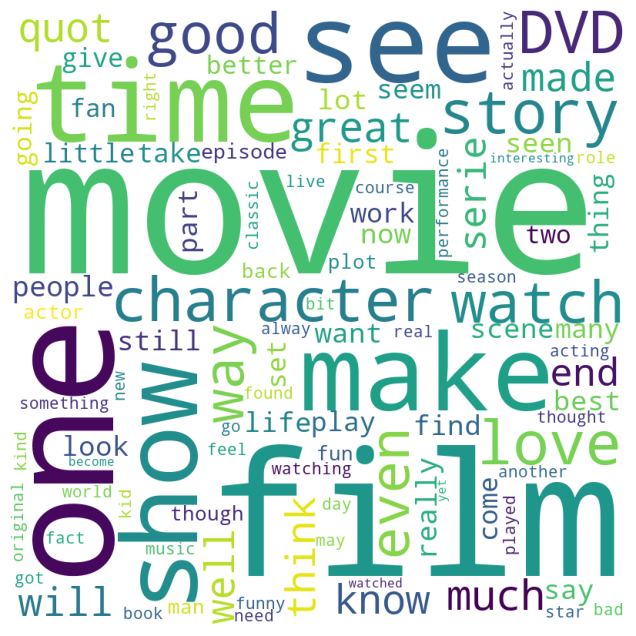

In [168]:
from wordcloud import WordCloud

# Concatenate the text and summary columns into one string
text = ' '.join(X_train['Text'].tolist() + X_train['Summary'].tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(text)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Intercept:  4.19810410730716
Coefficients:  [ 0.05649452 -0.05406589]


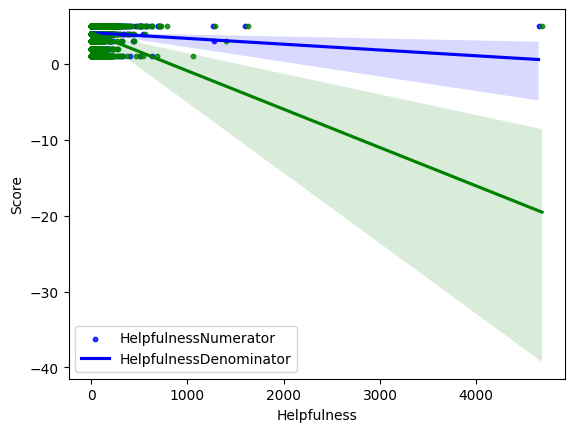

In [171]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
X_train = pd.read_csv("./data/X_train.csv")

# Extract the relevant columns
X = X_train[['HelpfulnessNumerator', 'HelpfulnessDenominator']]
Y = X_train['Score']

# Fit the linear regression model
lr = LinearRegression()
lr.fit(X, Y)

# Print the coefficients of the linear regression model
print("Intercept: ", lr.intercept_)
print("Coefficients: ", lr.coef_)

# Plot the data points and the regression line
sns.regplot(x=X['HelpfulnessNumerator'], y=Y, color='b', scatter_kws={'s':10})
sns.regplot(x=X['HelpfulnessDenominator'], y=Y, color='g', scatter_kws={'s':10})
plt.xlabel('Helpfulness')
plt.ylabel('Score')
plt.legend(labels=['HelpfulnessNumerator', 'HelpfulnessDenominator'])
plt.show()

